In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def print_image(image):
  cv2_imshow(cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2)))

In [ ]:
!curl https://i.ytimg.com/vi/tnSN2a4zl1c/maxresdefault.jpg > "/content/image.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74826  100 74826    0     0   203k      0 --:--:-- --:--:-- --:--:--  204k


Самостоятельно выбранное изображение перевести в формат grayscale. Выполнить контрастирование этого изображения так, что:
 - умакс - умин =50, где умакс и умин – соответственно наибольшее и наименьшее значение интенсивности полученного изображения.
 - Интенсивности пикселей исходного изображения преобразовывались пропорционально.

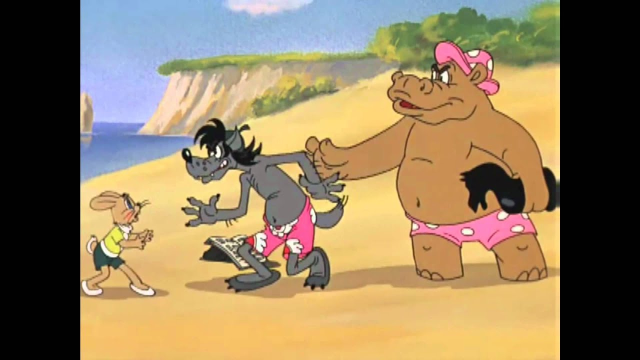

In [ ]:
image = cv2.imread('/content/image.jpg')
cv2_imshow(cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2)))

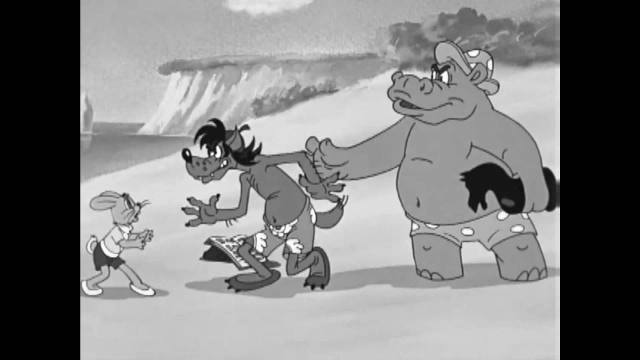

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print_image(gray_image)

Контрастирование изображения

In [ ]:
def y(x, x_min, x_max, y_min, y_max):
  return (x - x_min) / (x_max - x_min) * (y_max - y_min) + y_min

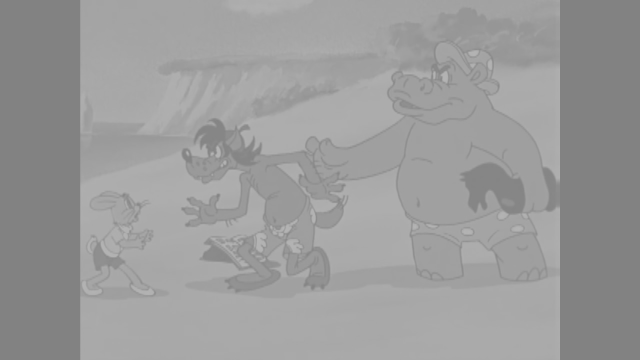

In [ ]:
y_min = 130
y_max = 180

x_min = gray_image.min()
x_max = gray_image.max()

image_not_contrast = np.zeros_like(gray_image, dtype=gray_image.dtype)

for i in range(gray_image.shape[0]):
  for j in range(gray_image.shape[1]):
    image_not_contrast[i, j] = y(gray_image[i, j], x_min, x_max, y_min, y_max)

print_image(image_not_contrast)

Выполнение обратнго преобразования

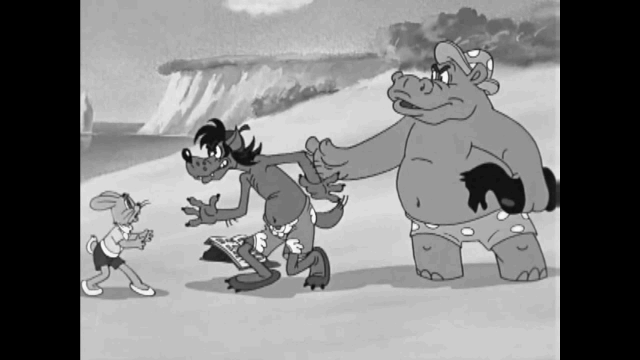

In [ ]:
image_contrast = np.zeros_like(image_not_contrast, dtype=image_not_contrast.dtype)

for i in range(image_not_contrast.shape[0]):
  for j in range(image_not_contrast.shape[1]):
    image_contrast[i, j] = y(image_not_contrast[i, j], y_min, y_max, x_min, x_max)

print_image(image_contrast)

Контрастирование цветного изображения

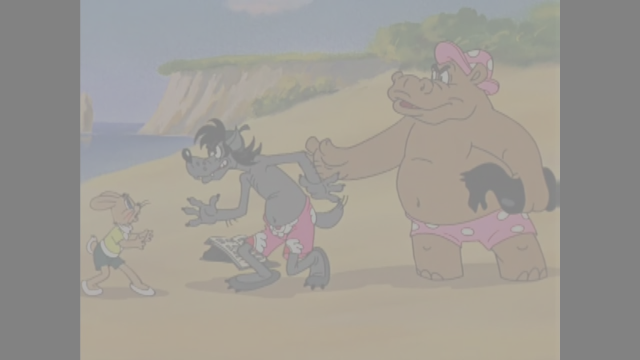

In [ ]:
y_min = 130
y_max = 180

x_b_min = image[:, :, 0].min()
x_g_min = image[:, :, 1].min()
x_r_min = image[:, :, 2].min()

x_b_max = image[:, :, 0].max()
x_g_max = image[:, :, 1].max()
x_r_max = image[:, :, 2].max()

image_contrast = np.zeros_like(image, dtype=image.dtype)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    image_contrast[i, j, 0] = y(image[i, j, 0], x_b_min, x_b_max, y_min, y_max)
    image_contrast[i, j, 1] = y(image[i, j, 1], x_g_min, x_g_max, y_min, y_max)
    image_contrast[i, j, 2] = y(image[i, j, 2], x_r_min, x_r_max, y_min, y_max)

print_image(image_contrast)

Подобрать различные (минимум три) значения параметра k для соляризации исходного изображения. Выбрать значение k, которое преобразует картинку к лучшему на ваш взгляд виду.

In [ ]:
def solarize(k, x, x_max=255):
  return cv2.multiply(cv2.multiply(k, cv2.subtract(x_max, x)), x)

Больше деталей получилось при значении k = 0.008

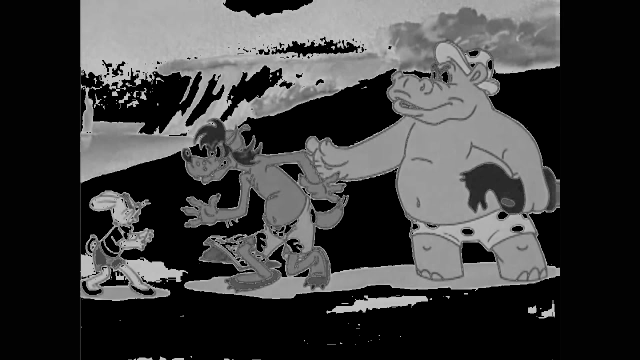

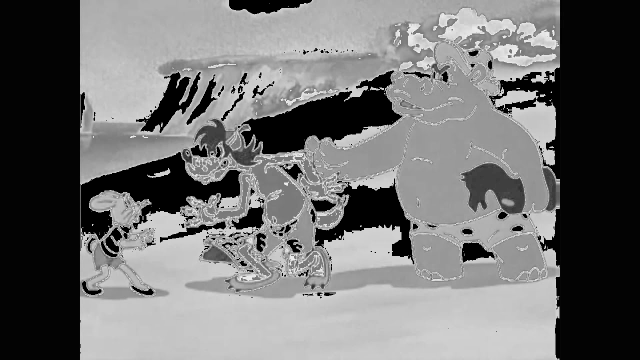

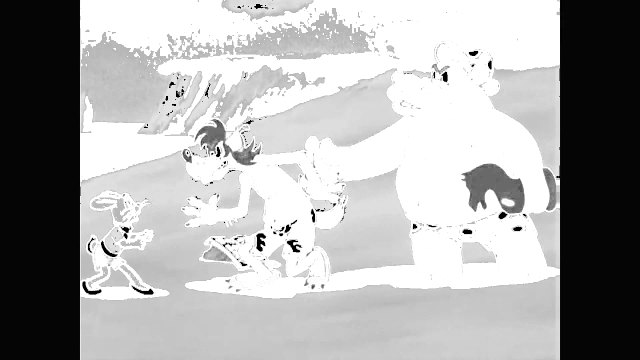

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x_max = gray_image.max()

ks = [0.008, 0.011, 0.02]

for k in ks:
  solarized_image = solarize(k, gray_image)
  print_image(solarized_image)

На выбранном вами изображении с текстом подобрать ядро преобразования, такое что после размытия видно, что текст есть, но прочитать его уже невозможно.

In [ ]:
!curl https://citatko.com/wp-content/uploads/2020/12/8-1.jpg > '/content/text_image.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84203  100 84203    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k


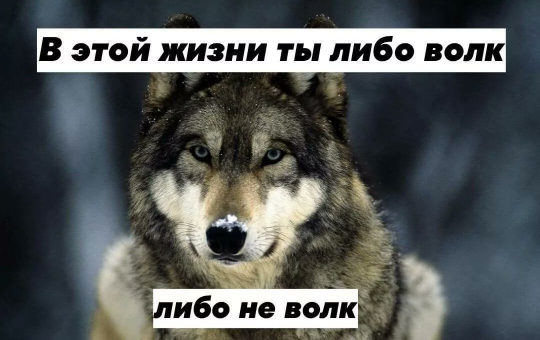

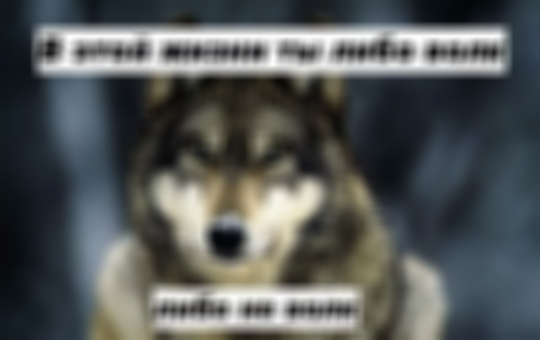

In [ ]:
wolf = cv2.imread('/content/text_image.jpg')
print_image(wolf)
kernel = np.ones((30, 30), np.float32) / 900
dst = cv2.filter2D(wolf, -1, kernel)
print_image(dst)

Применение к изображению двухстороннюю фильтрацию.

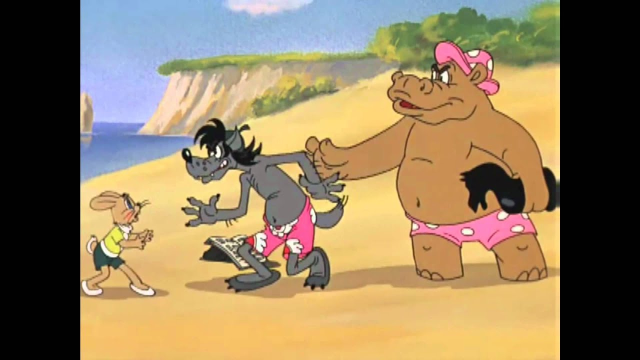

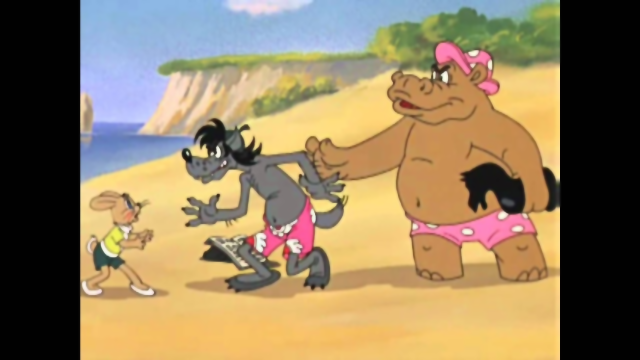

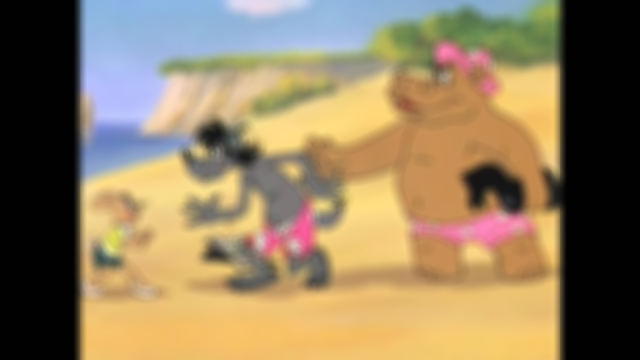

In [ ]:
print_image(image)
blur = cv2.bilateralFilter(image, 9, 200, 200)
print_image(blur)
blur = cv2.bilateralFilter(image, 30, 900, 1000)
print_image(blur)

Применить фильтры собеля, Лапласса, алгоритм Канни для выделения границ фигур на grayscale изображении.


In [ ]:
!curl https://img.dmclk.ru/c960x640q80/suburban/78/d3/78d3a7941f9b4cb2a058af766a308d2d9214f7a9.jpg > '/content/house.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  147k    0  147k    0     0  56602      0 --:--:--  0:00:02 --:--:-- 56598


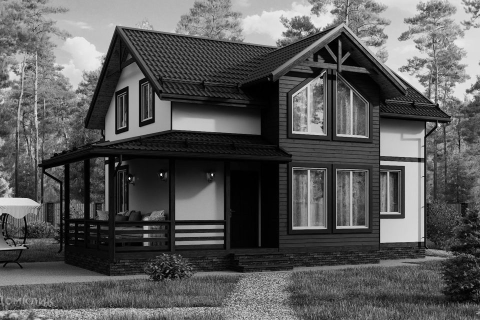

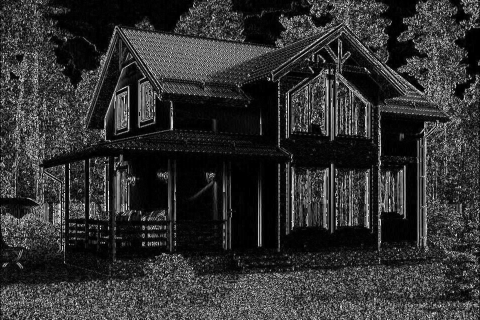

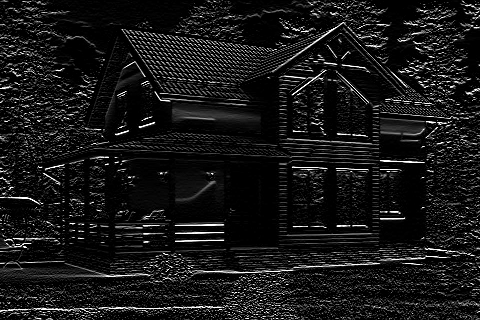

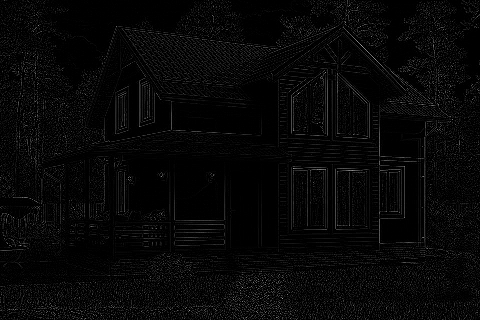

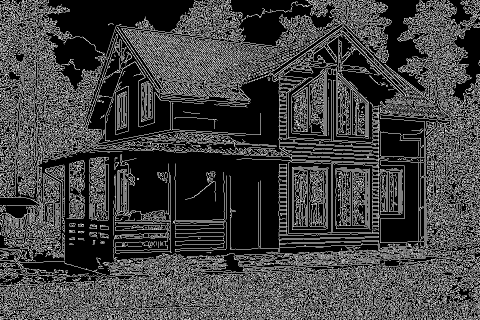

In [ ]:
house = cv2.imread('/content/house.jpg', cv2.IMREAD_GRAYSCALE)
print_image(house)
sobel_horizontal = cv2.Sobel(house, cv2.CV_64F, 1, 0, ksize=3)
abs_sobel64f = np.absolute(sobel_horizontal)
sobel_8u = np.uint8(abs_sobel64f)

sobel_vertical = cv2.Sobel(house, cv2.CV_64F, 0, 1, ksize=3)
print_image(sobel_8u)
print_image(sobel_vertical)
laplacian = cv2.Laplacian(house, cv2.CV_64F)
print_image(laplacian)
canny = cv2.Canny(house, 40, 100)
print_image(canny)